<a href="https://colab.research.google.com/github/smartie20/smartie20/blob/main/ASDproecsymptoms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/asdsymptoms.zip

Archive:  /content/asdsymptoms.zip
  inflating: asdsymptoms/Autism_Data.arff  


In [ ]:
import pandas as pd
from sklearn import metrics,model_selection,preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn. model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

In [ ]:
pd.set_option("display.max_columns", None)
df = pd.read_csv("/content/asdsymptoms/Autism_Data.arff", sep = r',', skipinitialspace = True)

df = df.fillna(0)
df = df.drop(["A7_Score"], axis = 1)
df = df.drop(["used_app_before"], axis = 1)

df = df.rename(columns = {"austim": "autism", "contry_of_res": "country"})
df = df.replace("yes", 1)
df = df.replace("no", 0)
df = df.replace("f", 1)
df = df.replace("m", 0)
df = df.replace("YES", 1)
df = df.replace("NO", 0)
df = df.replace("?", 0)

# Typecasting
df["ethnicity"] = df["ethnicity"].astype(str)
df["country"] = df["country"].astype(str)
df["age_desc"] = df["age_desc"].astype(str)
df["relation"] = df["relation"].astype(str)

# Initializing Encoder
number = preprocessing.LabelEncoder()

# Encoding
df["ethnicity"] = number.fit_transform(df["ethnicity"])
df["country"] = number.fit_transform(df["country"])
df["age_desc"] = number.fit_transform(df["age_desc"])
df["relation"] = number.fit_transform(df["relation"])
df.head

<bound method NDFrame.head of      A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A8_Score  \
0           1         1         1         1         0         0         1   
1           1         1         0         1         0         0         1   
2           1         1         0         1         1         0         1   
3           1         1         0         1         0         0         1   
4           1         0         0         0         0         0         1   
..        ...       ...       ...       ...       ...       ...       ...   
699         0         1         0         1         1         0         1   
700         1         0         0         0         0         0         1   
701         1         0         1         1         1         0         1   
702         1         0         0         1         1         0         0   
703         1         0         1         1         1         0         1   

     A9_Score  A10_Score age  gender  ethnici

In [ ]:
X = df.drop(["autism"], axis = 1).values
y = df["autism"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#defining estimators function with a array to save the models after learning for bars chart ploting 
def print_estimator_name(estimator):
    return estimator.__class__.__name__
estimators=[] #estimators array
classifiers = [] #classifiers array to save classification models for confusion matrices ploting
scores = [] #scores array for saveing presicion and recall results for comparing
acc=[] #saving accuracy scores for bars chart ploting
f1=[] #saveing f1 score for bars chart ploting

In [ ]:
clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 5)
clf = clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred,average='weighted')
recall = metrics.recall_score(y_test, y_pred,average='weighted')
f1_score = metrics.f1_score(y_test, y_pred,average='weighted')

In [ ]:
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1_score',f1_score)

accuracy 0.900709219858156
precision 0.8235055724417426
recall 0.900709219858156
f1_score 0.8603789562824178


In [ ]:
#creating scores dictionary and saving each calculation in its array
scores_dict = {"precision": precision, "recall": recall}
scores.append(scores_dict)
acc.append(accuracy)
f1.append(f1_score)
estimators.append(print_estimator_name(clf))
classifiers.append(clf)

In [ ]:
# calling precision and recall calculations for each model and converting the dictionary to dataframe for easy comparing
scores_df = pd.DataFrame(scores)
scores_df

,precision,recall
0,0.823506,0.900709


In [ ]:
print('classifiers', classifiers)

classifiers [DecisionTreeClassifier(criterion='entropy', max_depth=5)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


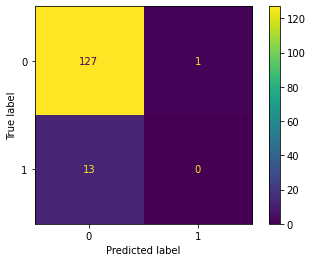

In [ ]:
cf=plot_confusion_matrix(clf,X_test,y_test)
plt.show(cf)

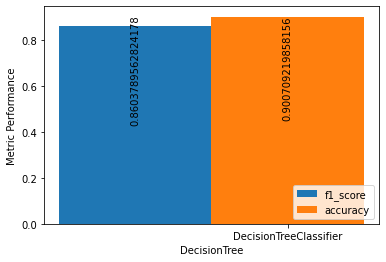

In [ ]:
fig, ax = plt.subplots()
width=0.2
bar_plot1 = ax.bar(np.arange(len(estimators)),f1,width,tick_label=estimators)
bar_plot2 = ax.bar(np.arange(len(estimators))+width,acc,width,tick_label=estimators)

ax.set_xlabel('DecisionTree')
ax.set_ylabel('Metric Performance')
ax.legend(('f1_score','accuracy'),loc='lower right')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.5*height,height,ha='center', va='bottom', rotation=90)
autolabel(bar_plot1)
autolabel(bar_plot2)
plt.show()